Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-06-27: Achat - Prix: 141.66
2022-06-28: Vente - Prix: 137.44
2022-06-29: Vente - Prix: 139.23
2022-06-30: Vente - Prix: 136.72
2022-07-01: Achat - Prix: 138.93
2022-07-05: Achat - Prix: 141.56
2022-07-06: Achat - Prix: 142.92
2022-07-07: Achat - Prix: 146.35
2022-07-08: Achat - Prix: 147.04
2022-07-11: Achat - Prix: 144.87
2022-07-12: Achat - Prix: 145.86
2022-07-13: Achat - Prix: 145.49
2022-07-14: Achat - Prix: 148.47
2022-07-15: Achat - Prix: 150.17
2022-07-18: Achat - Prix: 147.07
2022-07-19: Achat - Prix: 151.00
2022-07-20: Achat - Prix: 153.04
2022-07-21: Achat - Prix: 155.35
2022-07-22: Achat - Prix: 154.09
2022-07-25: Achat - Prix: 152.95
2022-07-26: Achat - Prix: 151.60
2022-07-27: Achat - Prix: 156.79
2022-07-28: Achat - Prix: 157.35
2022-07-29: Achat - Prix: 162.51
2022-08-01: Achat - Prix: 161.51
2022-08-02: Achat - Prix: 160.01
2022-08-03: Achat - Prix: 166.13
2022-08-04

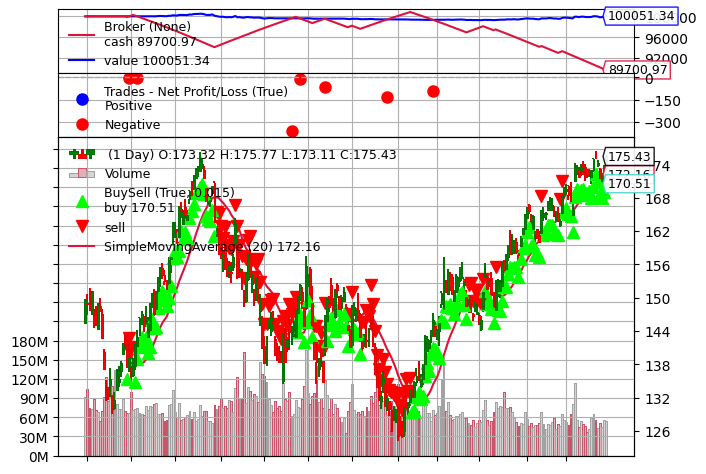

In [ ]:
!pip install backtrader

import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Définir la stratégie de trading
class MaStrategie(bt.Strategy):
    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=20)

    def next(self):
        if self.data.close[0] > self.sma[0]:
            self.buy()  # Effectuer un achat
            self.log('Achat - Prix: {:.2f}'.format(self.data.close[0]))  # Ajouter un log
        elif self.data.close[0] < self.sma[0]:
            self.sell()  # Effectuer une vente
            self.log('Vente - Prix: {:.2f}'.format(self.data.close[0]))  # Ajouter un log

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}: {txt}')

# Fonction principale
def main():
    # Créer une instance de Cerebro (moteur de backtesting)
    cerebro = bt.Cerebro()

    # Ajouter la stratégie au Cerebro
    cerebro.addstrategy(MaStrategie)

    # Charger les données historiques du fichier CSV
    df = pd.read_csv('AAPL.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Convertir les données historiques en format compatible avec backtrader
    data = bt.feeds.PandasData(dataname=df)

    # Ajouter les données au Cerebro
    cerebro.adddata(data)

    # Définir le capital initial
    cerebro.broker.setcash(100000.0)

    # Exécuter le backtesting
    cerebro.run()

    # Afficher le solde final
    print('Solde final:', cerebro.broker.getvalue())

    # Récupérer le graphique généré par backtrader
    fig = cerebro.plot(style='candlestick', returnfig=True)[0][0]

    # Afficher le graphique et les logs dans Google Colab
    display(fig)

    # Sauvegarder le graphique
    plt.savefig('graphique_algo_gen.png')
# Exécutez le bot
if __name__ == '__main__':
    main()


In [ ]:
!pip install backtrader
import numpy as np
import pandas as pd
import backtrader as bt
import matplotlib.pyplot as plt

class AntStrategy(bt.Strategy):
    def __init__(self):
        self.signal = None
        self.buy_threshold = 5
        self.sell_threshold = 15
        self.transactions = []

        self.sma25 = bt.indicators.SimpleMovingAverage(self.data.close, period=25)
        self.sma100 = bt.indicators.SimpleMovingAverage(self.data.close, period=100)

    def generate_signal(self):
        if self.sma25[0] > self.sma100[0] and self.sma25[-1] < self.sma100[-1]:
            return 'BUY'
        else:
            return 'SELL'

    def execute_buy(self):
        self.buy()
        self.transactions.append(('BUY', self.data.datetime.date(0), self.data.close[0]))

    def execute_sell(self):
        self.sell()
        self.transactions.append(('SELL', self.data.datetime.date(0), self.data.close[0]))

    def next(self):
        if not self.position:
            self.signal = self.generate_signal()
            if self.signal == 'BUY':
                self.execute_buy()
        else:
            should_sell = self.signal == 'SELL'
            if should_sell:
                self.execute_sell()
                self.signal = None

    def notify_trade(self, trade):
        if trade.isclosed:
            pnl = trade.pnl
            self.log(f"Trade clôturé - Gagnant : {pnl:.2f}")

    def notify_order(self, order):
        if order.status == order.Completed:
            if order.isbuy():
                self.log(f"Achat exécuté - Prix : {order.executed.price:.2f}")
            elif order.issell():
                self.log(f"Vente exécutée - Prix : {order.executed.price:.2f}")

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f"{dt.isoformat()} - {txt}")

# Chargement des données historiques depuis le fichier "AAPL.csv" avec pandas
df = pd.read_csv('AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Conversion du DataFrame pandas en liste de dictionnaires
data = bt.feeds.PandasData(dataname=df, datetime='Date')

# Création du cerveau (broker) Backtrader avec un capital de départ de 1000
cerebro = bt.Cerebro()
cerebro.broker.setcash(1000)

# Ajout de la stratégie au cerveau
cerebro.addstrategy(AntStrategy)

# Ajout des données au cerveau
cerebro.adddata(data)

# Exécution du cerveau
cerebro.run()

# Affichage du graphique des résultats
cerebro.plot(style='candlestick', barup='green', bardown='red', figsize=(12, 8))

# Sauvegarder le graphique
plt.savefig('graphique_fourmies.png')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-02-14 - Achat exécuté - Prix : 152.12


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import urllib

# Préparer les données pour l'entraînement du réseau de neurones
def data_set_create(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

# Charger les données historiques
data1 = pd.read_csv("AIR.PA.csv")
data2 = pd.read_csv("CAP.PA.csv")
data3 = pd.read_csv("OR.PA.csv")
data4 = pd.read_csv("SAF.PA.csv")
data_set = pd.read_csv("AAPL.csv")

# Concaténer les données historiques
train_data  = pd.concat([data1, data2, data3, data4], axis=0)

# Sélectionner les colonnes intéressantes
train_data  = train_data [["Date", "Close"]]
data_set = data_set[["Date", "Close"]]

# Transformer la date en format numérique
train_data ["Date"] = pd.to_datetime(train_data ["Date"])
train_data ["Date"] = (train_data ["Date"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data_set["Date"] = pd.to_datetime(data_set["Date"])
data_set["Date"] = (data_set["Date"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
train_data ["Close"] = scaler.fit_transform(train_data [["Close"]])
data_set["Close"] = scaler.fit_transform(data_set[["Close"]])

# Diviser les données en ensembles d'entraînement et de test
train_data = train_data .iloc[:-200]
test_data = train_data .iloc[-200:]

window_size = 30
train_X, train_Y = data_set_create(train_data["Close"].values, window_size)
test_X, test_Y = data_set_create(test_data["Close"].values, window_size)

# Créer le modèle de réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(window_size,)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

# Compiler le modèle
model.compile(optimizer="adam", loss="mse")

# Entraîner le modèle
model.fit(train_X, train_Y, epochs=50, batch_size=32)

# Faire des prédictions sur les données de test
predictions = model.predict(test_X)

# Inverser la normalisation
predictions = scaler.inverse_transform(predictions)
test_Y = test_Y.reshape(-1, 1)
test_Y = scaler.inverse_transform(test_Y)

# Calculer l'erreur moyenne absolue
mae = np.mean(np.abs(predictions - test_Y))
print("MAE:", mae)

portfolio = 1000
size = 0
profits = 0

# Initialiser les listes pour stocker les valeurs à tracer
portfolio_values = [portfolio]
benefit_values = [profits]

AAPL_X, AAPL_Y = data_set_create(data_set["Close"].values, window_size)

# Prédire les prix futurs
future_prices = model.predict(AAPL_X)
future_prices = scaler.inverse_transform(future_prices)
data_set = scaler.inverse_transform(data_set)
AAPL_X = scaler.inverse_transform(AAPL_X)

# Prendre des décisions de trading en conséquence
for i in range(len(future_prices) - 1):
    initial_portfolio = portfolio
    if future_prices[i + 1] > future_prices[i] and portfolio > AAPL_X[i][0]:
        size = portfolio // AAPL_X[i][0]
        portfolio -= AAPL_X[i][0] * size
        cost = size * AAPL_X[i][0]
    elif future_prices[i + 1] < future_prices[i] and size > 0:
        gain = AAPL_X[i][0] * size
        profits += gain - cost
        portfolio += AAPL_X[i][0] * size
        size = 0
    
    # Ajouter la valeur actuelle du portefeuille et des bénéfices à la liste
    portfolio_values.append(portfolio)
    benefit_values.append(profits)

# Tracer le graphique des valeurs du portefeuille et des bénéfices
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values, label="Valeur du portefeuille")
plt.plot(benefit_values, label="Bénéfices")
plt.xlabel("Période")
plt.ylabel("Valeur")
plt.title("Évolution de la valeur du portefeuille et des bénéfices")
plt.legend()
plt.savefig("benefice_et_portefeuille_deep_learning.png")  # Sauvegarder le graphique
plt.close()  # Fermer le graphique


copie = pd.read_csv("AAPL.csv")

# Tracer le graphique de l'évolution du prix de l'action AAPL avec le temps et les prédictions faites par le modèle de réseau de neurones
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(copie.index, copie["Close"], label="Prix réel", color='red')
ax1.plot(copie.index[window_size:], future_prices, label="Prix prédit", color='blue')
ax1.set_ylabel("Prix de l'action AAPL")
ax1.set_xlabel("Temps")
ax1.legend()
plt.savefig("evolution_prix_AAPL_deep_learning.png")  # Sauvegarder le graphique
plt.close()  # Fermer le graphique

print("Bénéfices totaux:", profits)


Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 11/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 12/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 13/50
25/25 [==============================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bénéfices totaux: -122.79978799999924


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Chargement des données depuis les fichiers CSV
train_data_1 = pd.read_csv('AIR.PA.csv')  # Données d'entraînement 1
train_data_2 = pd.read_csv('CAP.PA.csv')  # Données d'entraînement 2
train_data_3 = pd.read_csv('OR.PA.csv')  # Données d'entraînement 3
test_data = pd.read_csv('AAPL.csv')  # Données de test

# Concaténer les données d'entraînement en un seul DataFrame
train_data = pd.concat([train_data_1, train_data_2, train_data_3])

# Prétraitement des données d'entraînement
X_train = train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
X_train_pct_change = X_train.pct_change(periods=14).dropna()
X_train_normalized = (X_train_pct_change - X_train_pct_change.mean()) / X_train_pct_change.std()
X_train_array = X_train_normalized.values

# Entraînement de l'algorithme de clustering
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0).fit(X_train_array)

# Prétraitement des données de test
X_test = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
X_test_pct_change = X_test.pct_change(periods=14).dropna()
X_test_normalized = (X_test_pct_change - X_test_pct_change.mean()) / X_test_pct_change.std()
X_test_array = X_test_normalized.values

# Prédiction des clusters pour les données de test
test_clusters = kmeans.predict(X_test_array)

# Simulation du trading
initial_capital = 10000  # Capital initial
position = 0  # Position initiale

buy_dates = []  # Liste des dates d'achat
buy_prices = []  # Liste des prix d'achat
sell_dates = []  # Liste des dates de vente
sell_prices = []  # Liste des prix de vente
balance_evolution = []

# Supprimer les 14 premières lignes des données de test
test_data_14_sup = test_data.drop(test_data.index[:14])

# Parcourir les données de test
for i in range(len(test_data_14_sup)):
    current_price = test_data_14_sup.iloc[i]['Close']
    if X_test_pct_change.iloc[i].mean() < X_train_array[kmeans.labels_ == test_clusters[i]].mean() and initial_capital > 0:
        # Signal d'achat
        position = initial_capital / current_price  # Achat de la position en utilisant tout le capital
        initial_capital = initial_capital - position * current_price
        if initial_capital < 0.1:
            initial_capital = 0
        buy_dates.append(test_data_14_sup.iloc[i]['Date'])
        buy_prices.append(current_price)
    elif X_test_pct_change.iloc[i].mean() > X_train_array[kmeans.labels_ == test_clusters[i]].mean() and position > 0:
        # Signal de vente
        initial_capital = position * current_price  # Vente de la position pour obtenir le nouveau capital
        position = 0
        sell_dates.append(test_data_14_sup.iloc[i]['Date'])
        sell_prices.append(current_price)

    balance = initial_capital if position == 0 else position * current_price  # Calcul du portefeuille à chaque étape
    balance_evolution.append(balance)

final_capital = initial_capital + position * current_price

# Calcul du rendement de l'investissement
return_on_investment = (final_capital - 10000) / 10000 * 100

print(f"Capital final : {final_capital}")
print(f"Rendement de l'investissement : {return_on_investment}%")
print(len(sell_dates), len(buy_dates))

# Affichage des résultats du trading
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].plot(test_data['Date'], test_data['Close'], label='Prix')
axs[0].legend()
axs[0].set_title("Résultats")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Prix de clôture (€)')

# Augmenter l'espacement des dates sur l'axe des x
axs[0].set_xticks(test_data['Date'][::200])

# Créer le graphique de l'évolution de la valeur de l'investissement
axs[1].plot(test_data['Date'].iloc[:len(balance_evolution)], balance_evolution)
axs[1].set_title("Évolution du portefeuille")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Valeur (€)')

# Augmenter l'espacement des dates sur l'axe des x
axs[1].set_xticks(test_data['Date'][::200])

# Affichage de l'évolution de balance_evolution au cours du temps
axs[1].plot(test_data['Date'].iloc[:len(balance_evolution)], balance_evolution, label='Évolution du portefeuille')
axs[1].legend()

plt.show()
plt.savefig("resultat_machine_learning.png")  # Sauvegarder le graphique
plt.close()  # Fermer le graphique


Capital final : 10829.934768138672
Rendement de l'investissement : 8.299347681386717%
15 15


<IPython.core.display.Javascript object>